### Chapter 3 - Approaching Almost ANy ML Problem

### Evaluation Metrics
### Classification - Accuracy, Precision Recall F1 Score ROC, AUC, Log Loss, Precision@k Avg Precision@K, Mean Avg Precision@K
### MAE, MSE, RMSE, RootMeanSqrdLogE, Mean%E ( MPE), Mean abs $ E 

# Equal # of +ve & -ve samples in the dataset then accuracy, precision , recall & F1 score

In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import manifold

In [2]:
def accuracy(Y_true,Y_pred):
    correct_counter =0
    for yp,yt in zip(Y_pred,Y_true):
        if yt == yp:
            correct_counter += 1
    return correct_counter / len(Y_true)

In [4]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1,l2)

0.625

### when data is imbalanced then precision & Recall

In [ ]:
###binary classification - 0 healthy, 1 - cancer
    Pred & Actual
TP - 1 & 1
TN - 0 & 0
FP - 1 & 0
FN - 0 & 1

In [11]:
def true_positive(Y_true,Y_pred):
    tp = 0
    for yp,yt in zip(Y_pred,Y_true):
        if yt == 1 and yp == 1:
            tp += 1
    return tp
def true_negative(Y_true,Y_pred):
    tn = 0
    for yp,yt in zip(Y_pred,Y_true):
        if yt == 0 and yp == 0:
            tn += 1
    return tn
def false_positive(Y_true,Y_pred):
    fp = 0
    for yp,yt in zip(Y_pred,Y_true):
        if yt == 0 and yp == 1:
            fp += 1
    return fp
def false_negative(Y_true,Y_pred):
    fn = 0
    for yp,yt in zip(Y_pred,Y_true):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [12]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
print(true_positive(l1,l2))
print(true_negative(l1,l2))
print(false_positive(l1,l2))
print(false_negative(l1,l2))

2
3
1
2


### Accuracy Score = (TP + TN) / (TP + TN + FP + FN)

Precision = TP / ( TP + FP )
100 - Actual 90/10 - predicted - 80/8
          = 8 / ( 8 + 10)
          = TP - 44.4%
Recall = TP / ( TP + FN ) - TPR - Sensitivity
       = 8 / ( 8 + 2) = 80%

F1 score 
F1 = 2PR / (P + R)
F1 = 2TP /( 2TP + FP + FN )

### for skewed target - We shd look at F1 score instead of accuracy

### TPR = TP / ( TP + FN ) 
### FPR = FP / ( TN + FP )
### (1 - FPR) = specificity or True Negative Rate or TNR 

In [18]:
### precision , Recall , TPR & FPR definitions
def precision(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    precision = tp / ( tp + fp )
    return precision
def recall(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    recall = tp / ( tp + fn )
    return recall
def TPR(y_true,y_pred):
    return recall(y_true,y_pred)
def FPR(y_true,y_pred):
    fp = false_positive(y_true,y_pred)
    tn = true_negative(y_true,y_pred)
    return fp / ( tn + fp)

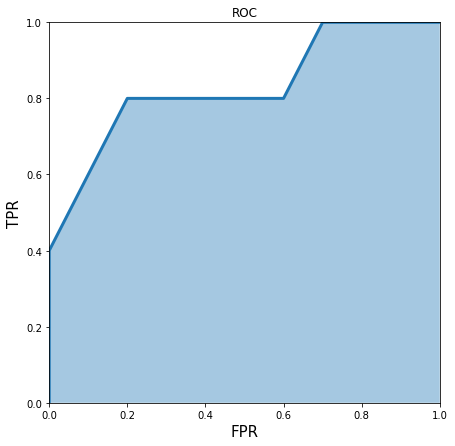

In [27]:
tpr_list = []
fpr_list = []
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_pred = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]
thresholds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1.0]

for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    temp_tpr = TPR(y_true,temp_pred)
    temp_fpr = FPR(y_true,temp_pred)
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

plt.figure(figsize=(7,7))
plt.fill_between(fpr_list,tpr_list,alpha=0.4)
plt.plot(fpr_list,tpr_list,lw=3)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title('ROC')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.show()

In [ ]:
### Reciever operating Characterstic( ROC )
### Area under ROC - AUC
### AUC = 1 - perfect Model ; be carefull mostly mistake about validation 
### AUC = 0 - Very Bad model ; inverting probalities of prediction p vs 1-p
### AUC = 0.5 - Predictions are random
### AUC = 0 - 0.5 - worst than Random
### e.g. AUC = 0.85 build a model to detect cancer then if u pick a positive sample and a negative sample then cancer image will 
### rank higher than non cancel with a prob of 0.85
### u can use ROC to pick the best threshold
### AUC is widely used for skewed Binary classification

In [ ]:
### Log Loss - Similar to Cost function
  log loss = -1.0 * ( target*log(pred) + (1-target)*log(1-pred) )
### Log Loss penalizes quite high for incorrect or far off prediction.

In [ ]:
### Multiclass Classification problem
### all of the above is same and shd be calculated for Each class
### 3 different ways
1) Macro Avg Precision - calculate precision for all classes and then avg
2) Micro Avg Precision - calculate class wise TP & FP and then use that to calculate Precision
3) Weighted Precision  - same as Macro but weighted avg depeds on the number of items in each class

1) Macro Avg Recall
2) Micro Avg Recall
3) Weighted Recall

In [ ]:
### Macro Precision
loop over all class
for class_ in range(num_class):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]
    tp = true_positive(temp_true,temp_pred)
    fp = false_positive(temp_true,temp_pred)
    temp_precision = tp / ( tp + fp )
    precision += temp_precision
    
precision /= num_class
return precision

### Micro Precision
loop over all class
tp = 0
fp = 0
for class_ in range(num_class):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]
    tp += true_positive(temp_true,temp_pred)
    fp += false_positive(temp_true,temp_pred)        
    
precision = tp / ( tp + fp)
return precision

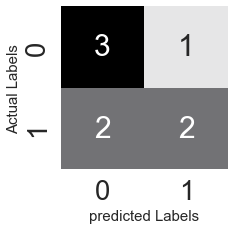

In [38]:
### Confusion Matrix
###.  TP, FP, TN, FN
### FP - Type 1 error
### FN - Type II error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
y_true = [0,1,1,1,0,0,0,1]
y_pred = [0,1,0,1,0,1,0,0]
cm = metrics.confusion_matrix(y_true,y_pred)

plt.figure(figsize=(3,3))
cmap = sns.cubehelix_palette(20,hue=0.05,rot=0,light=0.9,dark=0,as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm,annot=True,cmap=cmap,cbar=False)
plt.ylabel('Actual Labels',fontsize=15)
plt.xlabel('predicted Labels',fontsize=15)
plt.show()

### Multilabel Classification
### Precision@K
### Avg Precision@K
### Mean Avg Precision@K
### Log Loss
### Precision is def as no of hits in the predicted list consideting only top K predictions divided by K

In [ ]:
### per sample
def pk(y_true,y_pred,k):
    if k == 0:
        return 0
    y1_pred = y_pred[:k]
    pred_set = set(y1_pred)
    true_set = set(y_true)
    common_val = pred_set.intersection(true_set)
    return len(common_val) / len(y_pred[:k])

In [ ]:
### Avg Precision@K
### Calculate AP@3 then P@1 , P@2, P@3 then Avg
def apk(y_true,y_pred,k):
    pk_val = []
    for i in range(1,k+1):
        pk_val.append(pk(y_true,y_pred,i))
    if len(pk_val) == 0:
        return 0
    return sum(pk_val) / len(pk_val)

In [ ]:
### MAP@K
def mapk(y_true,y_pred,k):
    apk_val = []
    for i in range(len(y_true)):
        apk_val.append(apk(y_true,y_pred,k=k)
    return sum(apk_val) / len(apk_val)

### Regression
### Error = True Val - Predicted Val
### ABS Error = abs(True Val - Predicted Val) - MAE
### Sqred Erroe = (True Val - Predicted Val) ** 2 - MSE
### RMSE = SQRT( MSE) 
### SLE / MSLE / RMSLE = (log(1+y_true) - log(1+y_pred)) ** 2
### % error = ((True Val - Predicted Val) / True val) * 100 - MAbsPercentageErr
### R2 - coeff of determination
###    R2 = 1 - Num/den
###     num = sum(( y true - y pred) **2 )
###     den.= sum(( y trye - y true mean ) ** 2)
### MCC - Mathew's corelation Coeff
### MCC = (TP*TN - FP*FN) / [(TP+FP) * (FN+TN) * (FP+TN) * (TP+FN)] ^ 0.5